In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import ImageGrab

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Question 1

### A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

###  We are going to conduct a 2 tailed t-Test on 2 Independent samples with Numerical Data. We need to check whether the mean of both samples are different and Is there any significance difference between the two samples?

In [3]:
cutlets=pd.read_csv("Cutlets.csv")

In [4]:
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [5]:
# here we apply descriptive statistics

cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [6]:
# checking for null values

cutlets.isna().sum()

Unit A    0
Unit B    0
dtype: int64

In [7]:
# we are checking here the duplicate values

cutlets[cutlets.duplicated()]

,Unit A,Unit B


In [8]:
# for checking the data type
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


## Plotting the data

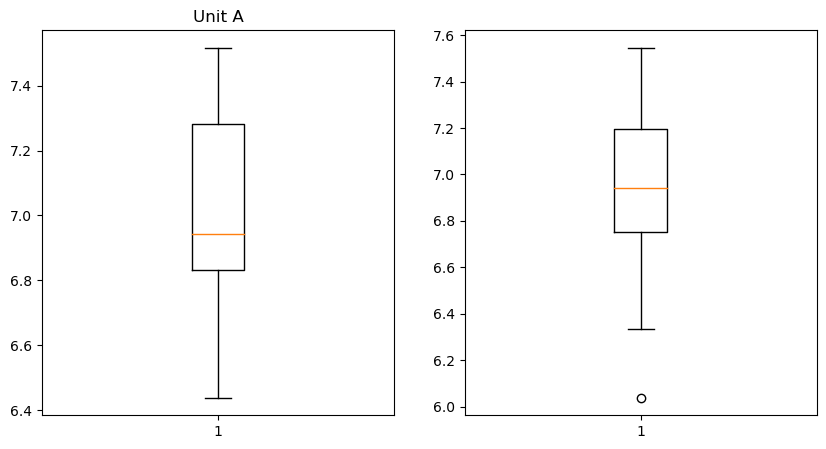

In [9]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(cutlets['Unit A'])
plt.title("Unit A")
plt.subplot(1,2,2)
plt.boxplot(cutlets['Unit B'])
plt.show()

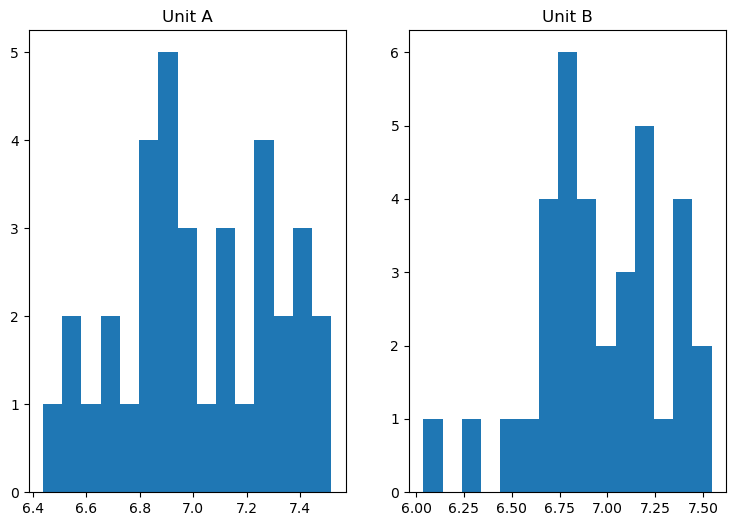

In [10]:
plt.subplots(figsize = (9,6))
plt.subplot(1,2,1)
plt.hist(cutlets['Unit A'], bins = 15)
plt.title('Unit A')
plt.subplot(1,2,2)
plt.hist(cutlets['Unit B'], bins = 15)
plt.title('Unit B')
plt.show()

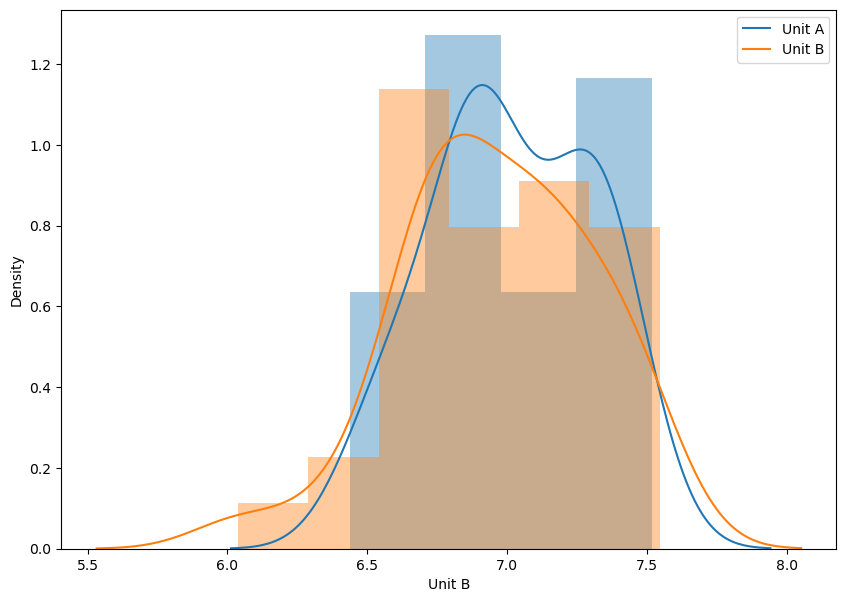

In [11]:
plt.figure(figsize = (10,7))
labels = ['Unit A','Unit B']
sns.distplot(cutlets['Unit A'], kde = True)
sns.distplot(cutlets['Unit B'],hist = True)
plt.legend(labels)

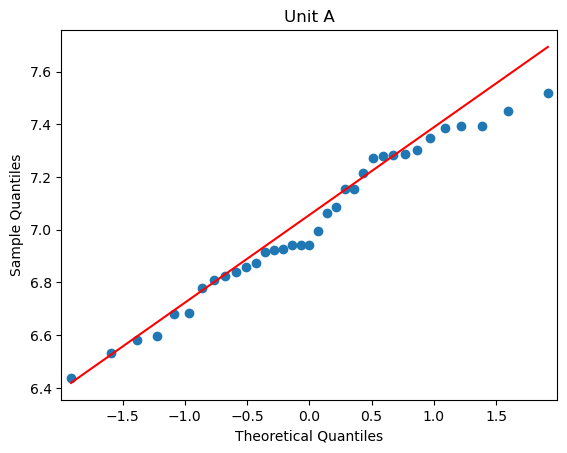

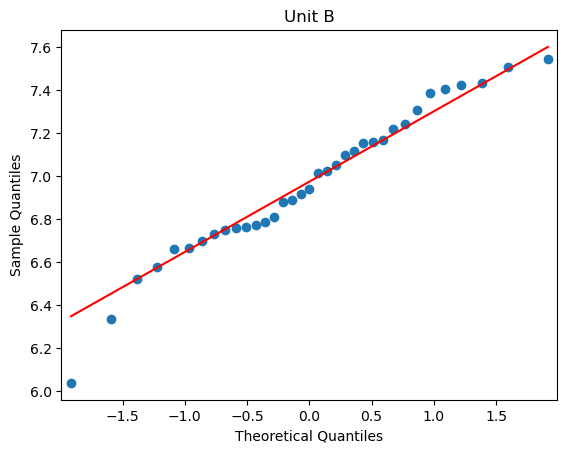

In [12]:
# Plotting Q-Q plot to check whether the distribution follows normal distribution or not.

sm.qqplot(cutlets["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(cutlets["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

## Hypothesis Testing using t-statistics.

In [13]:
statistic , p_value = stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= 0.4722394724599501


In [14]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis


In [15]:
# Hence, We fail to reject Null Hypothesis because of lack of evidence, there is no significant difference between the two samples

# Question 2

### A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch. Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [16]:
df=pd.read_csv("LabTAT.csv")

In [17]:
df.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [18]:
df.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [19]:
df.isna().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [20]:
df[df.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


## Plotting the data

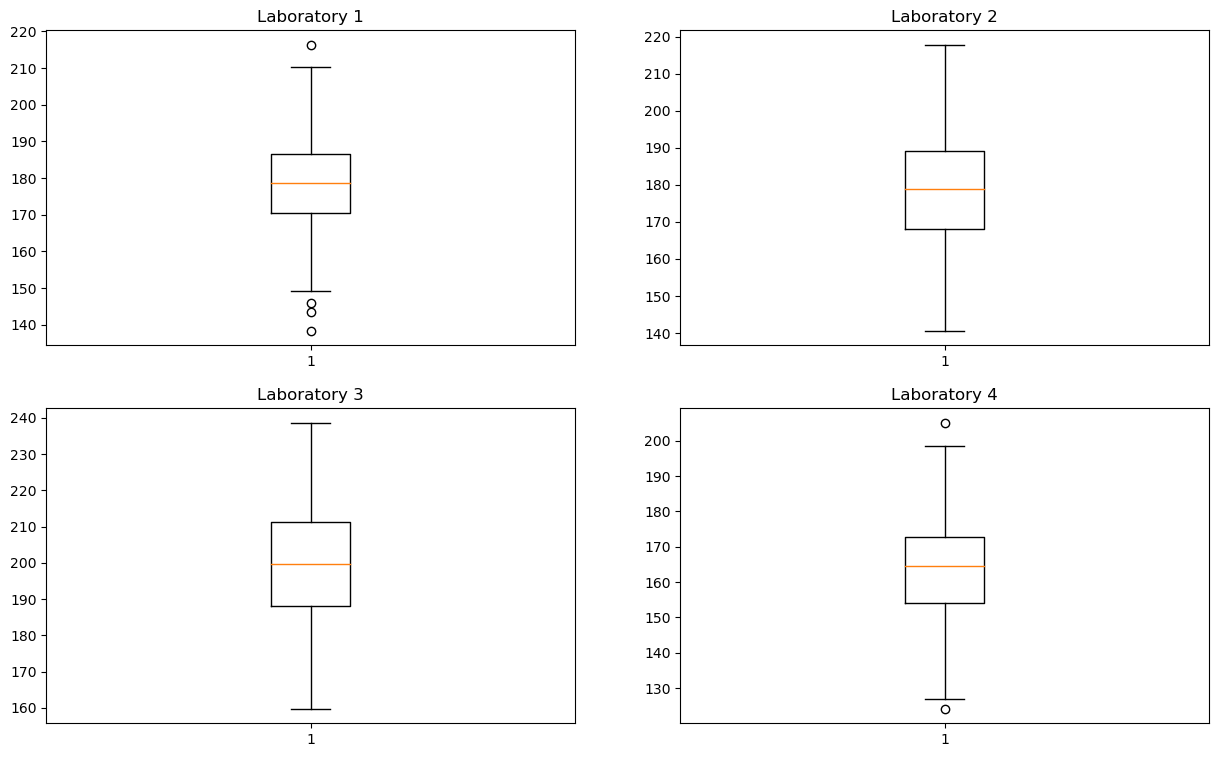

In [22]:
plt.subplots(figsize = (15,9))
plt.subplot(2,2,1)
plt.boxplot(df['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(2,2,2)
plt.boxplot(df['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(2,2,3)
plt.boxplot(df['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(2,2,4)
plt.boxplot(df['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

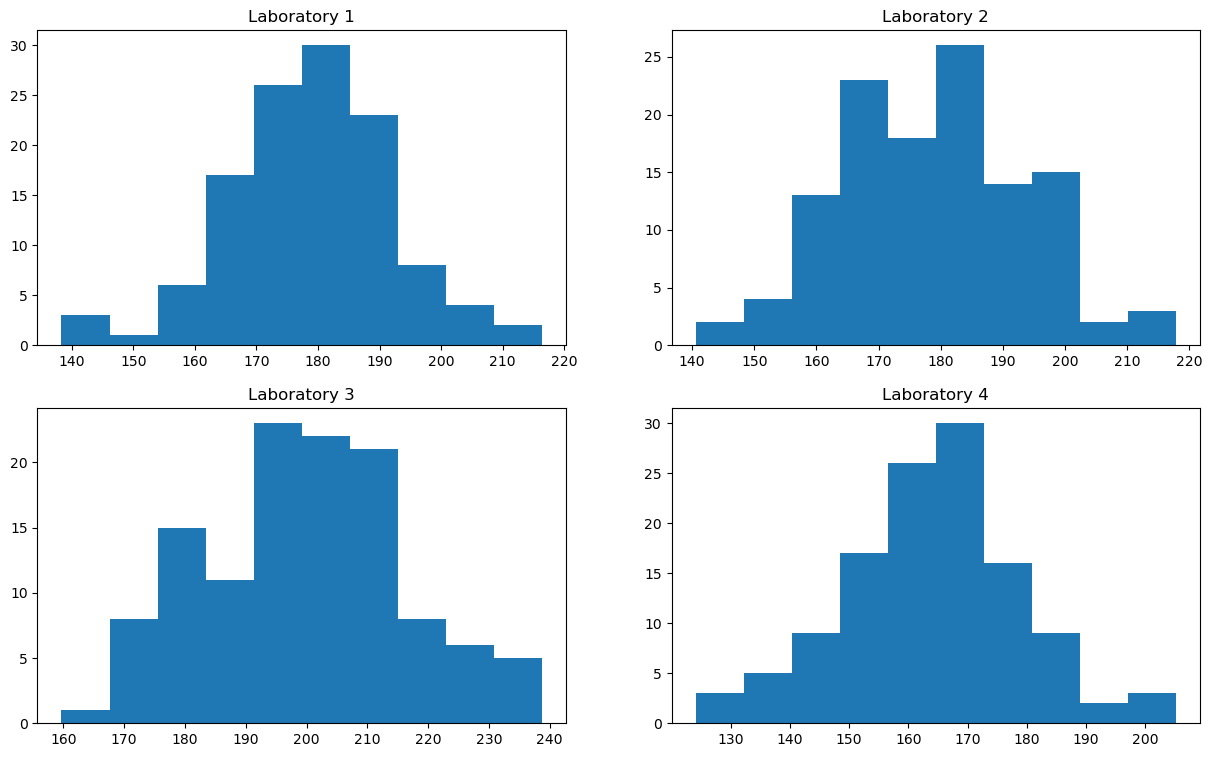

In [23]:
plt.subplots(figsize = (15,9))
plt.subplot(2,2,1)
plt.hist(df['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(2,2,2)
plt.hist(df['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(2,2,3)
plt.hist(df['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(2,2,4)
plt.hist(df['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

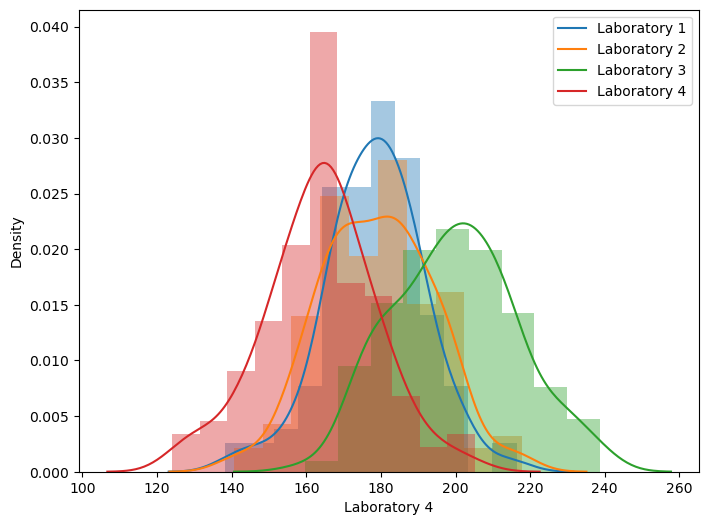

In [24]:
plt.figure(figsize=(8,6))
labels=['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4']
sns.distplot(df['Laboratory 1'],kde=True)
sns.distplot(df['Laboratory 2'],hist=True)
sns.distplot(df['Laboratory 3'],hist=True)
sns.distplot(df['Laboratory 4'],hist=True)
plt.legend(labels)

## Q-Q Plot for checking the normal distribution

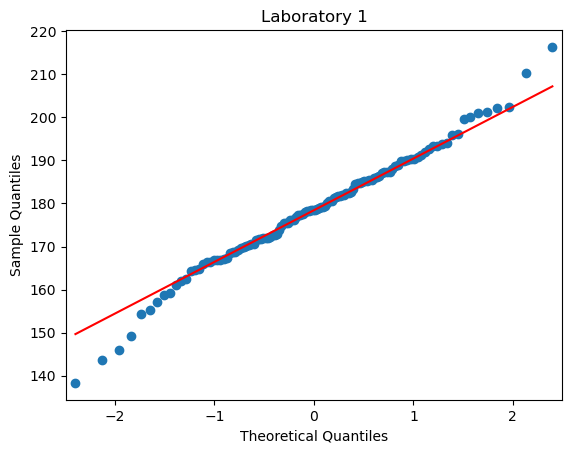

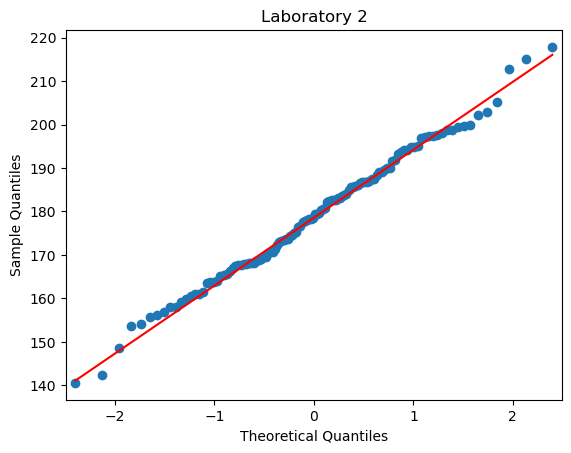

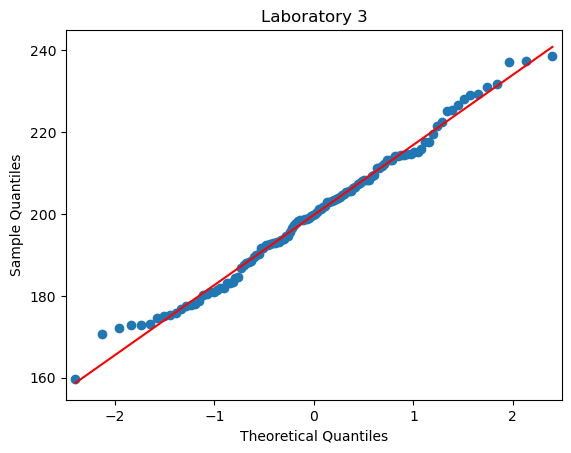

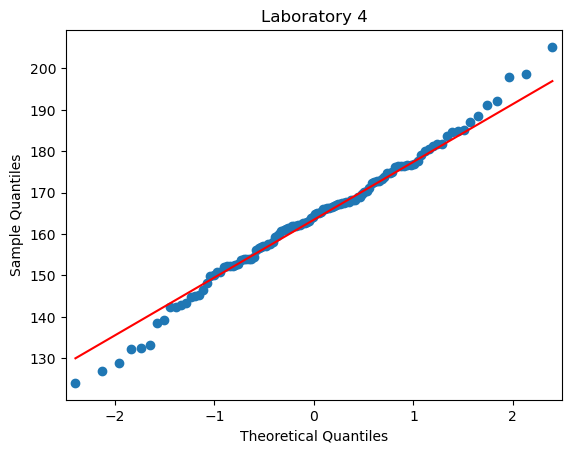

In [25]:
sm.qqplot(df['Laboratory 1'],line = 'q')
plt.title('Laboratory 1')
sm.qqplot(df['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(df['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(df['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

## Hypothesis using t-statictic

In [26]:
test_statistic , p_value = stats.f_oneway(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],df.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


In [27]:
# Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference between the samples.

### Q.3. Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

In [28]:
from scipy.stats import chi2_contingency

In [29]:
df=pd.read_csv("BuyerRatio.csv")

In [30]:
df.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [31]:
# Here our null hypothesis is independence of categorical variables
# And our alternate hypothesis is dependence of all categorical variables 
# Our data is categorical we use the chi square hypothesis

In [32]:
# Converting to dimensional array
obv=np.array([[50,142,131,70],[435,1523,1356,750]])
obv

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

In [33]:
# chi2 contingency independent test

chi2_contingency(obv)
#//(outcome: chi2 value,p_value,degrees of freedom and expected observation)

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [ ]:
''' Since, our p value is less than the given significant value is more so we accept our null hypothesis
 and reject our alterntive hypothesis, this also states that proportion of sales of products between males
 and femalesat all four region are equal.'''

### Q.4. TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and has to be reworked before processing. The manager wants to check whether the defective % varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences.

In [34]:
df=pd.read_csv("Costomer+OrderForm.csv")

In [35]:
df.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [36]:
# Here our null hypothesis is defective percentage does not varies by center
# Here our alternative hypothesis is defective percentage does varies by center 
# All are variables are categorical we use the chi square hypothesis

In [37]:
# Calculating the value counts of every country

In [38]:
df.Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [39]:
df.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [40]:
df.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [41]:
df.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [42]:
# Dimensional array 
obv= np.array([[271,267,269,280],[29,33,31,20]])
obv

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [43]:
# chi2 contingency independence test
chi2_contingency(obv)#(outcome: chi stat value,p_value,df,observations)


(3.858960685820355,
 0.2771020991233135,
 3,
 array([[271.75, 271.75, 271.75, 271.75],
        [ 28.25,  28.25,  28.25,  28.25]]))

In [44]:
# Hence, the p value is more than our significant value we reject our alternative hypothesis and accept our null hypothesis,